# Understanding the Venezuelan Refugee Crisis

## By Nikita Ravi and Apoorva Ravi Balasubramanian

<p>
Venezuela has the second largest migration population, after Syria, for people displaced across international borders. This refugee crisis is a major crisis which, for the first time history, has required a joint effort of UNHCR and IOM. This joint effort called for a funding of $738 million to assist Latin America and the Caribbean with receiving migrants. 
    
There are many reasons for why Venezuelans are being displaced from their country of origin, including famine, a crumbling healthcare, and violation of human, civil, and political rights (Van Praag, 2019). 
    
The objective of this report is to understand the magnitude of this crisis by analyzing data, using Python, from the UNHCR repository and a website with a collection of data from host countries indicating the number of Venezuelan Refugees. 
    
</p>

## Venezuelan Migrants Migrating to Various Countries

In [31]:
import pandas as pd
import numpy as np
import folium
import matplotlib.pyplot as plt

In [4]:
json_file = "world_countries2.json"

world_map = folium.Map(zoom_start=12)

world_map.choropleth(
    geo_data=json_file,
    data=df_clean,
    columns=['Country of Origin','Frequency for Entire Year'],
    key_on='feature.properties.sovereignt',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Number of Venezuelan Refugees'
)


world_map

/Users/nikitaravi/opt/anaconda3/lib/python3.7/site-packages/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


<p>
As a result of the economic and political situation in Venezuela, many of the country's citizens are taking a hard journey to take refuge in other countries for a better livelihood. The figure above illustrates all the countries that accepted the Venezuelan Refugees. From the color scale on the top right of the world map, you can understand that Colombia have accepted most of the refugees from Venezuela. 
    
</p>

In [14]:
world_map = folium.Map(location = [-8.7832, -55.4915], zoom_start = 3)

refugees = folium.map.FeatureGroup()

latitude = df_clean["Centroid Latitude"]
longitude = df_clean["Centroid Longitude"]
frequency = df_clean["Frequency"]
maxFreq = max(df_clean["Frequency"])

for lat, lng, radii, label in zip(latitude, longitude, frequency/10000, df_clean["Country"]):
    refugees.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius = radii,
            color = 'blue',
            fill=True,
            fill_color='yellow',
            fill_opacity=0.6,
            popup = label + ": " + str(int(radii * 10000))
        )
    )
    


world_map.add_child(refugees)

<p>
From the figure above you can see that Colombia has the largest data point indicating that it is indeed the host country with the largest acceptance of Venezuelan migrants (641,825 refugees)
    
</p>

## Migrants with Different Countries of Origin Accepted by Colombia

In [32]:
df = pd.read_csv("UNHCR_Asylum_Seekers_Determination_Col.csv")

df.drop([0], inplace = True)
df.drop(["Country / territory of asylum/residence", "RSD procedure type / level", "statistics.filter.decisions_recognized", "statistics.filter.decisions_other", "Total decisions", "Otherwise closed"], axis = 1, inplace = True)

df.replace("*", np.nan, inplace = True)
df.dropna(inplace = True)

for col in df.columns:
    if(col == "Origin"):
        pass
    else:
        df[col] = df[col].astype(int)
        
df['Frequency for Entire Year'] = df['Total persons pending start-year'] + df['Applied during year'] - df['Rejected'] + df['Total persons pending end-year']
df['UNHCR assisted Entire Year'] = df['of which UNHCR-assisted'] + df['of which UNHCR-assisted.1']
df.drop(['Total persons pending start-year', 'of which UNHCR-assisted', 'Applied during year', 'Rejected', 'Total persons pending end-year', 'of which UNHCR-assisted.1'], axis = 1, inplace = True)

df.columns = ['Year', 'Country of Origin', 'Frequency for Entire Year', 'Number of Assists by UNHCR for Entire Year']

df_2015 = df[df["Year"] == 2015]

country_frequency = df.groupby(df_2015['Country of Origin'])['Frequency for Entire Year'].sum().reset_index()
country_UNHCR_assists = df.groupby(df_2015['Country of Origin'])['Number of Assists by UNHCR for Entire Year'].sum().reset_index()

country_frequency.set_index("Country of Origin", inplace = True)
country_UNHCR_assists.set_index("Country of Origin", inplace = True)

df_clean = country_frequency.merge(country_UNHCR_assists, left_index = True, right_index = True)

df_clean.drop(["Stateless"], inplace = True)

df_clean.reset_index(inplace = True)

df_clean.replace("Bolivia (Plurinational State of)", "Bolivia", inplace = True)
df_clean.replace("Venezuela (Bolivarian Republic of)", "Venezuela", inplace = True)
df_clean.replace("Syrian Arab Rep.", "Syria", inplace = True)

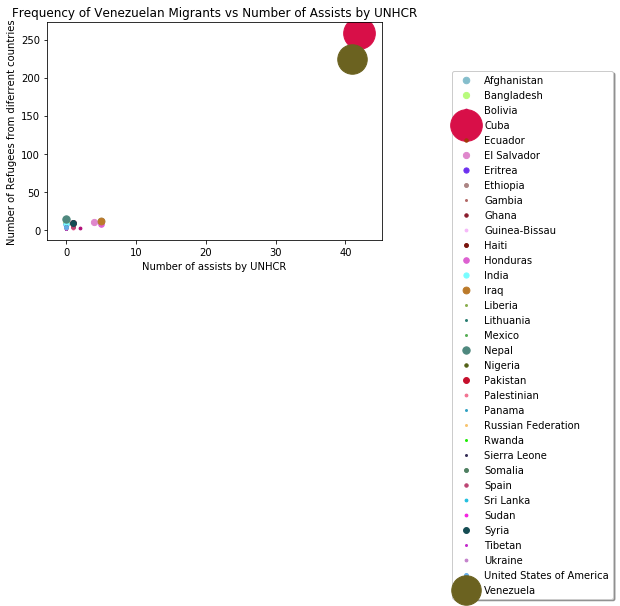

In [35]:
from random import randint
colors = []

for i in range(len(df_clean["Country of Origin"])):
    colors.append('#%06X' % randint(0, 0xFFFFFF))
    
maxFreq = max(df_clean["Frequency for Entire Year"])
    
fig = plt.figure()
ax = plt.subplot(111)


for i in range(len(df_clean["Country of Origin"])):
    ax.scatter(df_clean["Number of Assists by UNHCR for Entire Year"][i], df_clean["Frequency for Entire Year"][i], 
               label = df_clean["Country of Origin"][i], c = colors[i], s = (df_clean["Frequency for Entire Year"][i] / maxFreq) * 1000) 

ax.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)

plt.title("Frequency of Venezuelan Migrants vs Number of Assists by UNHCR")
plt.xlabel("Number of assists by UNHCR")
plt.ylabel("Number of Refugees from diferrent countries")

plt.show()

<p>
From the two world maps above, we can understand that most of the refugees are taken in by Colombia. In 2015, Colombia has accepted refugees from 35 different countries. The above scatter plot illustrates that the more refugees from a particular country, the more UNHCR will take steps to assist them. The graph above shows that Cuba and Venezuela are where majority of the refugees in Colombia come from, as indicated by the large radius of the data point. This also indicates majority of UNHCR's attention is on Venezuela, emphasizing the brevity of the Venezuelan migration crisis. 
</p>

In [16]:
df = pd.read_csv("UNHCR_Asylum_Seekers_Determination_Col.csv")

df.drop([0], inplace = True)
df.drop(["RSD procedure type / level", "statistics.filter.decisions_recognized", "statistics.filter.decisions_other", "Total decisions", "Otherwise closed"], axis = 1, inplace = True)

df = df[df['Origin'] == 'Venezuela (Bolivarian Republic of)']

df.replace("*", np.nan, inplace = True)
df.dropna(inplace = True)

for col in df.columns:
    if(col == "Origin"):
        pass
    elif(col == "Country / territory of asylum/residence"):
        pass
    else:
        df[col] = df[col].astype(int)
        
df['Frequency for Entire Year'] = df['Total persons pending start-year'] + df['Applied during year'] - df['Rejected'] + df['Total persons pending end-year']
df['UNHCR assisted Entire Year'] = df['of which UNHCR-assisted'] + df['of which UNHCR-assisted.1']
df.drop(['Total persons pending start-year', 'of which UNHCR-assisted', 'Applied during year', 'Rejected', 'Total persons pending end-year', 'of which UNHCR-assisted.1'], axis = 1, inplace = True)

df.columns = ['Year', 'Country of Asylum', 'Country of Origin', 'Frequency for Entire Year', 'Number of Assists by UNHCR for Entire Year']

df.replace("Venezuela (Bolivarian Republic of)", "Venezuela", inplace = True)

df.set_index("Year", inplace = True)

frequency_year = df.groupby(df.index)['Frequency for Entire Year'].sum().reset_index()
frequency_year.set_index("Year", inplace = True)

UNHCR_year = df.groupby(df.index)['Number of Assists by UNHCR for Entire Year'].sum().reset_index()
UNHCR_year.set_index("Year", inplace = True)

df_clean = frequency_year.merge(UNHCR_year, left_index = True, right_index = True)

df_clean.reset_index(inplace = True)

## Number of Venezuelan Migrants in Colombia Each Year

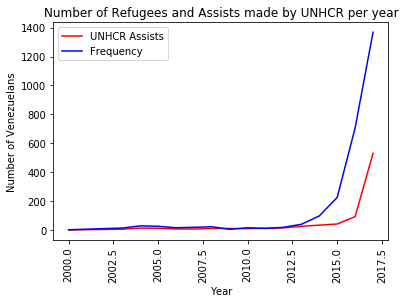

In [18]:
plt.plot(df_clean['Year'], df_clean['Number of Assists by UNHCR for Entire Year'], 'r-', label = "UNHCR Assists")
plt.plot(df_clean['Year'], df_clean['Frequency for Entire Year'], 'b-', label = "Frequency")

plt.legend()


plt.title("Number of Refugees and Assists made by UNHCR per year")
plt.xlabel("Year")
plt.ylabel("Number of Venezuelans")

plt.xticks(rotation = 90)

plt.show()

<p>
Seeing as majority of the refugees taken in by Colombia are Venezuelans, it is important to understand the trend in the number of Venezuelans seeking refuge from their troubles in Colombia. From the graph above, we can see that there is an increase in Venezuelan refugees each year arriving in Colombia. Although the number of assists made by UNHCR to support these Venezuelan refugees are increasing, the help does not reach all Venezuelan refugees as indicated by the large gap between the two lines on the graph. This suggests that the Venezuelan migration is a real crisis
</p>

In [13]:
df = pd.read_json("Venezuelan Migration Breakdown per Country.json")

for dicts in df["data"]:
    for item in dicts:
        dicts[item] = [dicts[item]]
        
frames = []
for i in range(len(df["data"])):
    temp = pd.DataFrame.from_dict(df["data"][i])
    frames.append(temp)
    

df_clean = pd.concat(frames)

df_clean.set_index("geomaster_name")
df_clean.reset_index(inplace = True)
df_clean.drop(["index"], axis = 1, inplace = True)

df_clean.drop(["geomaster_id", "geo_sv_id", "admin_level", "lat_max", "lon_max", "lat_min", "lon_min", "source", "month",
              "year", "published", "sv_published", "name", "color"], axis = 1, inplace = True)

df_clean.rename(columns = {"geomaster_name": "Country", "centroid_lon": "Centroid Longitude", "centroid_lat": "Centroid Latitude", "date": "Data recorded on", "individuals": "Frequency", "numChildren": "Number of Children"}, inplace = True)
df_clean.drop(["Number of Children"], axis = 1, inplace = True)

df_clean["Frequency"] = df_clean["Frequency"].values[::-1]
df_clean["Country"] = df_clean["Country"].values[::-1]
df_clean["Centroid Longitude"] = df_clean["Centroid Longitude"].values[::-1]
df_clean["Centroid Latitude"] = df_clean["Centroid Latitude"].values[::-1]
df_clean["Data recorded on"] = df_clean["Data recorded on"].values[::-1]

for col in df_clean.columns:
    if(col == "Country"):
        pass
    elif(col == "Data recorded on"):
        pass
    elif(col == "Centroid Longitude"):
        df_clean[col] = df_clean[col].astype(float)
    elif(col == "Centroid Latitude"):
        df_clean[col] = df_clean[col].astype(float)
    else:
        df_clean[col] = df_clean[col].astype(int)

## There are Different Categories of Venezuelan Migrants in Colombia

In [20]:
df = pd.read_csv("UNHCR_time_series_originating_venezuela.csv")

df.drop([0], inplace = True)
df.drop(["Origin"], axis = 1, inplace = True)
df.replace("*", np.nan, inplace = True)
df.dropna(inplace = True)

for col in df.columns:
    if(col == "Country / territory of asylum/residence"):
        pass
    elif(col == "Population type"):
        pass
    else:
        df[col] = df[col].astype(int)

In [21]:
refugee_years = df[df["Population type"] == "Refugees (incl. refugee-like situations)"]
refugee_years = refugee_years[refugee_years["Country / territory of asylum/residence"] == "Colombia"]
refugee_years.drop(["Country / territory of asylum/residence", "Population type"], axis = 1, inplace = True)

In [23]:
asylum_years = df[df["Population type"] == "Asylum-seekers"]
asylum_years = asylum_years[asylum_years["Country / territory of asylum/residence"] == "Colombia"]
asylum_years.drop(["Country / territory of asylum/residence", "Population type"], axis = 1, inplace = True)

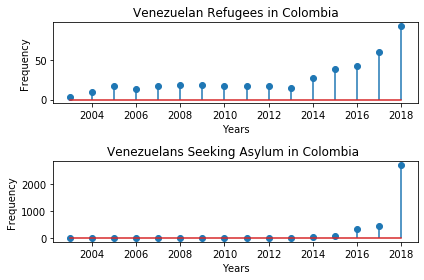

In [30]:
figure, axes = plt.subplots(nrows=2, ncols=1)

plt.subplot(2,1,1)
plt.stem(refugee_years['Year'], refugee_years['Value'], use_line_collection=True)
plt.title("Venezuelan Refugees in Colombia")
plt.xlabel("Years")
plt.ylabel("Frequency")

plt.subplot(2,1,2)
plt.stem(asylum_years["Year"], asylum_years["Value"], use_line_collection = True)
plt.title("Venezuelans Seeking Asylum in Colombia ")
plt.xlabel("Years")
plt.ylabel("Frequency")

figure.tight_layout()

plt.show()

<p>
There are two types of categories Venezuelan migrants in Colombia: Refugees and Asylum-Seekers and the numbers for both categories are increasing for each year in Colombia, with more asylum-seekers than refugees, especially in 2018. 
 
</p>

In [25]:
return_refugees = df[df["Population type"] == "Returned refugees"]
return_refugees = return_refugees[return_refugees["Country / territory of asylum/residence"] == "Colombia"]
return_refugees.drop(["Country / territory of asylum/residence", "Population type"], axis = 1, inplace = True)

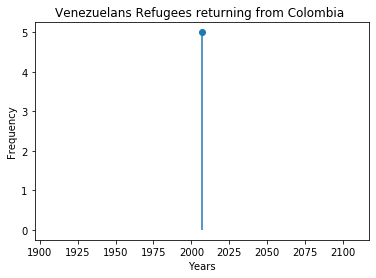

In [26]:
plt.stem(return_refugees["Year"], return_refugees["Value"], use_line_collection = True)
plt.title("Venezuelans Refugees returning from Colombia ")
plt.xlabel("Years")
plt.ylabel("Frequency")

plt.show()

<p>
In all the time that the Colombians have been accepting Venezuelan migrants into their country only 5 were returned back in 2007. That is, twenty percent of the migrants were returned back and that happened only once. 
    
</p>

## Conclusion

<p>
From all the figures shown above, it can be understood that the Venezuelan Migration is a crisis, involving the combined effort of UNHCR and IOM to ease the situation for both the migrants and the host countries. This is inferred by the fact that Colombia is accepting many migrants from other countries, how majority of the Venezuelans choose to seek refuge in Colombia, and finally the number of Venezuelan migrants are increasing each year in Colombia. By understanding all this, it becomes a necessity for the rest of the world to take a larger effort to solve this issue
    
</p>

## References

<p>
1) https://www.wilsoncenter.org/article/understanding-the-venezuelan-refugee-crisis
    
    
2) https://data.humdata.org/organization/unhcr?page=1#datasets-section


3) https://r4v.info/en/situations/platform

</p>